Epoch 1/25
160/160 [==============================] - 61s 349ms/step - loss: 1.8371 - accuracy: 0.3262 - val_loss: 1.5735 - val_accuracy: 0.4383
Epoch 2/25
160/160 [==============================] - 55s 345ms/step - loss: 1.4769 - accuracy: 0.4647 - val_loss: 1.3813 - val_accuracy: 0.5237
Epoch 3/25
160/160 [==============================] - 51s 317ms/step - loss: 1.3484 - accuracy: 0.5178 - val_loss: 1.2867 - val_accuracy: 0.5574
Epoch 4/25
160/160 [==============================] - 51s 321ms/step - loss: 1.2763 - accuracy: 0.5440 - val_loss: 1.2143 - val_accuracy: 0.5915
Epoch 5/25
160/160 [==============================] - 54s 334ms/step - loss: 1.2122 - accuracy: 0.5694 - val_loss: 1.1480 - val_accuracy: 0.6034
Epoch 6/25
160/160 [==============================] - 51s 317ms/step - loss: 1.1666 - accuracy: 0.5863 - val_loss: 1.1179 - val_accuracy: 0.6102
Epoch 7/25
160/160 [==============================] - 52s 328ms/step - loss: 1.1241 - accuracy: 0.6025 - val_loss: 1.0722 - val_ac

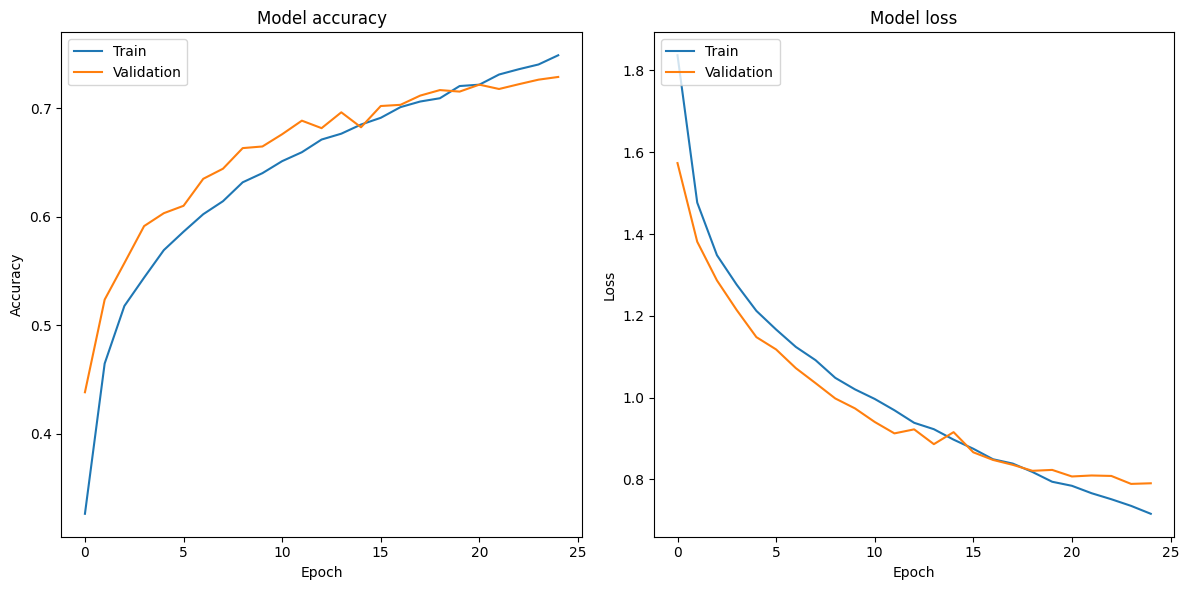

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

# Model configuration
img_width, img_height         = 32, 32
batch_size                    = 250
no_epochs                     = 25
no_classes                    = 10
validation_split              = 0.2
verbosity                     = 1

# Load CIFAR10 dataset
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Reshape data based on channels first / channels last strategy.
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 3, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 3, img_width, img_height)
    input_shape = (3, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 3)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 3)
    input_shape = (img_width, img_height, 3)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Convert target vectors to categorical targets
target_train = keras.utils.to_categorical(target_train, no_classes)
target_test = keras.utils.to_categorical(target_test, no_classes)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.kullback_leibler_divergence,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=verbosity,
                    validation_split=validation_split
)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
